## Research question
How does socialization with friends impact how lonely someone feels?

### Data

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('STA130_data.csv')

# Display the first few rows to get an overview of the data
df.head()

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,CONNECTION_social_days_friends_p7d_grouped,LONELY_direct
0,cscs_00001,1,Yes,Some days (1 - 3 days),All of the time (e.g. 5-7 days)]
1,cscs_00002,1,Yes,Some days (1 - 3 days),"None of the time (e.g., 0 days)"
2,cscs_00003,1,Yes,Every day (7 days),Some or a little of the time (e.g. 1-2 days)
3,cscs_00005,1,Yes,Some days (1 - 3 days),Occasionally or a moderate amount of time (e.g...
4,cscs_00006,1,Yes,Some days (1 - 3 days),Rarely (e.g. less than 1 day)


In [2]:
# Rename columns in the DataFrame
df.rename(columns={
    'CONNECTION_social_days_friends_p7d_grouped': 'Friend Socialization',
    'LONELY_direct': 'Loneliness'
}, inplace=True)

In [3]:
# Display the first 5 rows to confirm the changes
df.head()


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,Friend Socialization,Loneliness
0,cscs_00001,1,Yes,Some days (1 - 3 days),All of the time (e.g. 5-7 days)]
1,cscs_00002,1,Yes,Some days (1 - 3 days),"None of the time (e.g., 0 days)"
2,cscs_00003,1,Yes,Every day (7 days),Some or a little of the time (e.g. 1-2 days)
3,cscs_00005,1,Yes,Some days (1 - 3 days),Occasionally or a moderate amount of time (e.g...
4,cscs_00006,1,Yes,Some days (1 - 3 days),Rarely (e.g. less than 1 day)


In [4]:
# Display the first few rows to inspect the data
df.head()

# Check the data types and non-null counts of each column
df.info()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11431 entries, 0 to 11430
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UNIQUE_id             11431 non-null  object
 1   UNIQUE_num_records    11431 non-null  int64 
 2   ELIGIBLE_consent      11431 non-null  object
 3   Friend Socialization  9165 non-null   object
 4   Loneliness            8792 non-null   object
dtypes: int64(1), object(4)
memory usage: 446.7+ KB


UNIQUE_id                  0
UNIQUE_num_records         0
ELIGIBLE_consent           0
Friend Socialization    2266
Loneliness              2639
dtype: int64

In [5]:
# Drop rows where 'categorical_column' has the value 'Presented but no response'
df = df[df['Friend Socialization'] != 'Presented but no response']

# Drop rows where 'categorical_column' has the value 'Presented but no response'
df = df[df['Loneliness'] != 'Presented but no response']

In [6]:
# Drop columns and modify the DataFrame in place
df.drop(columns=['UNIQUE_id', 'UNIQUE_num_records', 'ELIGIBLE_consent'], inplace=True)

# Verify the result
print(df.head())

     Friend Socialization                                         Loneliness
0  Some days (1 - 3 days)                   All of the time (e.g. 5-7 days)]
1  Some days (1 - 3 days)                    None of the time (e.g., 0 days)
2      Every day (7 days)       Some or a little of the time (e.g. 1-2 days)
3  Some days (1 - 3 days)  Occasionally or a moderate amount of time (e.g...
4  Some days (1 - 3 days)                      Rarely (e.g. less than 1 day)


In [7]:
# Drop rows with any missing values
df = df.dropna()

# Drop NaN specifically from 'Loneliness' column if necessary
df = df.dropna(subset=['Loneliness'])

In [8]:
# Check for missing values in each column
df.isnull().sum()

Friend Socialization    0
Loneliness              0
dtype: int64

In [9]:
# Check unique values in a specific column
unique_values = df['Friend Socialization'].unique()
print(unique_values)

['Some days (1 - 3 days)' 'Every day (7 days)' 'None (0 Days)'
 'Most days (4 - 6 days)']


In [10]:
# Check unique values in a specific column
unique_values = df['Loneliness'].unique()
print(unique_values)

['All of the time (e.g. 5-7 days)]' 'None of the time (e.g., 0 days)'
 'Some or a little of the time (e.g. 1-2 days)'
 'Occasionally or a moderate amount of time (e.g. 3-4 days)'
 'Rarely (e.g. less than 1 day)']


## Variables

### Variable 1: CONNECTION_social_days_friends_p7d_grouped: 

In the PAST WEEK, how many days did you spend at least 5 minutes socializing with people from the following groups? - Friends

Answer options: None (0 Days), Some days (1 - 3 days), Most days (4 - 6 days), Every day (7 days)

### Variable 2: LONELY_direct: 

During the PAST WEEK, have you felt lonely?

Answer options: None of the time (e.g., 0 days), Rarely (e.g. less than 1 day), Some or a little of the time (e.g. 1-2 days), Occasionally or a moderate amount of time (e.g. 3-4 days), All of the time (e.g. 5-7 days)

## Hypothesis

My hypothesis is that an increase in friend socialization will result in a decrease in loneliness.

### Cleaning up data for visualization

In [11]:
# Check unique values in the 'Friend Socialization' column
print("Unique values in 'Friend Socialization':")
print(df['Friend Socialization'].unique())

# Check unique values in the 'Loneliness' column
print("\nUnique values in 'Loneliness':")
print(df['Loneliness'].unique())

Unique values in 'Friend Socialization':
['Some days (1 - 3 days)' 'Every day (7 days)' 'None (0 Days)'
 'Most days (4 - 6 days)']

Unique values in 'Loneliness':
['All of the time (e.g. 5-7 days)]' 'None of the time (e.g., 0 days)'
 'Some or a little of the time (e.g. 1-2 days)'
 'Occasionally or a moderate amount of time (e.g. 3-4 days)'
 'Rarely (e.g. less than 1 day)']


In [12]:
# Clean trailing/leading spaces and remove extra brackets
df['Friend Socialization'] = df['Friend Socialization'].str.strip()
df['Loneliness'] = df['Loneliness'].str.strip().str.replace(r'\]$', '', regex=True)

# Verify the updated unique values
print("Cleaned unique values in 'Friend Socialization':")
print(df['Friend Socialization'].unique())

print("\nCleaned unique values in 'Loneliness':")
print(df['Loneliness'].unique())


Cleaned unique values in 'Friend Socialization':
['Some days (1 - 3 days)' 'Every day (7 days)' 'None (0 Days)'
 'Most days (4 - 6 days)']

Cleaned unique values in 'Loneliness':
['All of the time (e.g. 5-7 days)' 'None of the time (e.g., 0 days)'
 'Some or a little of the time (e.g. 1-2 days)'
 'Occasionally or a moderate amount of time (e.g. 3-4 days)'
 'Rarely (e.g. less than 1 day)']


In [14]:
# Define the correct order for Friend Socialization
socialization_order = [
    'None (0 Days)', 'Some days (1 - 3 days)', 
    'Most days (4 - 6 days)', 'Every day (7 days)'
]

# Define the correct order for Loneliness
loneliness_order = [
    'None of the time (e.g., 0 days)', 
    'Rarely (e.g. less than 1 day)', 
    'Some or a little of the time (e.g. 1-2 days)', 
    'Occasionally or a moderate amount of time (e.g. 3-4 days)', 
    'All of the time (e.g. 5-7 days)'
]

# Convert to categorical with the specified order
df['Friend Socialization'] = pd.Categorical(df['Friend Socialization'], 
                                             categories=socialization_order, 
                                             ordered=True)

df['Loneliness'] = pd.Categorical(df['Loneliness'], 
                                   categories=loneliness_order, 
                                   ordered=True)


In [15]:
print("Updated 'Friend Socialization':")
print(df['Friend Socialization'].unique())

print("\nUpdated 'Loneliness':")
print(df['Loneliness'].unique())


Updated 'Friend Socialization':
['Some days (1 - 3 days)', 'Every day (7 days)', 'None (0 Days)', 'Most days (4 - 6 days)']
Categories (4, object): ['None (0 Days)' < 'Some days (1 - 3 days)' < 'Most days (4 - 6 days)' < 'Every day (7 days)']

Updated 'Loneliness':
['All of the time (e.g. 5-7 days)', 'None of the time (e.g., 0 days)', 'Some or a little of the time (e.g. 1-2 days)', 'Occasionally or a moderate amount of time (e...., 'Rarely (e.g. less than 1 day)']
Categories (5, object): ['None of the time (e.g., 0 days)' < 'Rarely (e.g. less than 1 day)' < 'Some or a little of the time (e.g. 1-2 days)' < 'Occasionally or a moderate amount of time (e.... < 'All of the time (e.g. 5-7 days)']


## Visualization

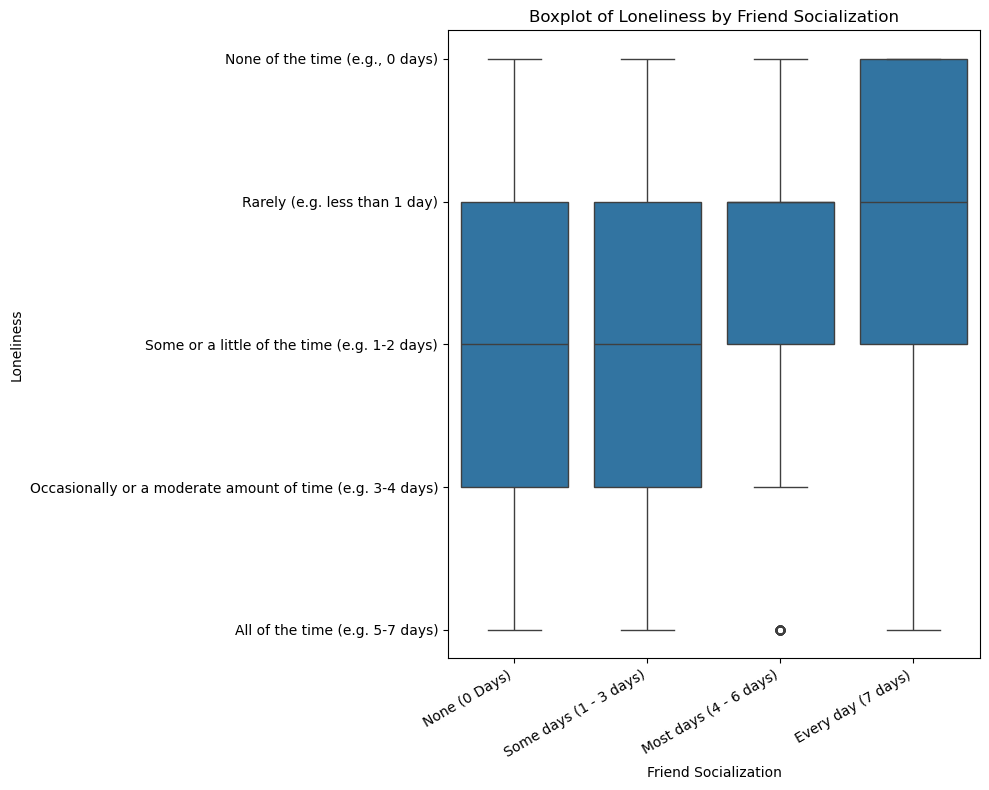

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.boxplot(x='Friend Socialization', y='Loneliness', data=df)
plt.title('Boxplot of Loneliness by Friend Socialization')
plt.xlabel('Friend Socialization')
plt.ylabel('Loneliness')

# Rotate x-axis labels
plt.xticks(rotation=30, ha='right')  # Rotate labels 30 degrees and align them to the right

plt.tight_layout()
plt.show()


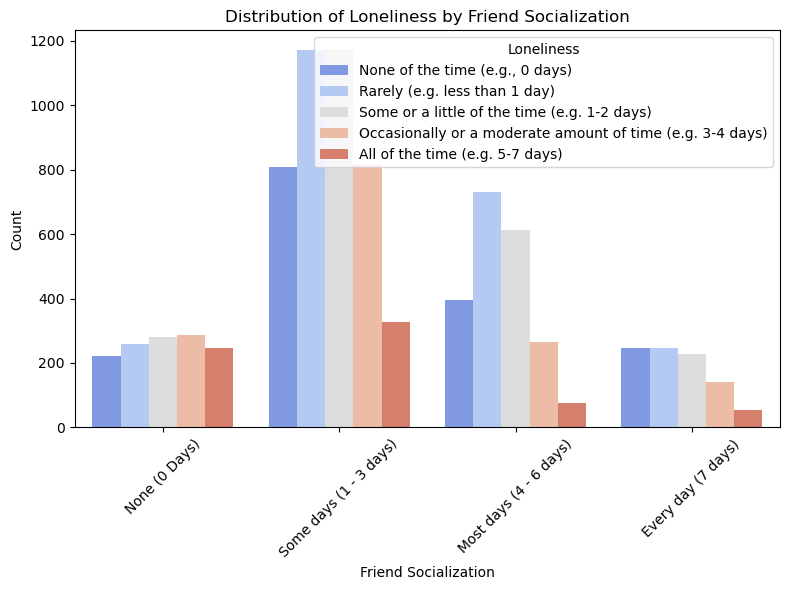

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Friend Socialization', hue='Loneliness', data=df, palette='coolwarm')
plt.title('Distribution of Loneliness by Friend Socialization')
plt.xlabel('Friend Socialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Frequency tables
socialization_counts = df['Friend Socialization'].value_counts(normalize=True) * 100
loneliness_counts = df['Loneliness'].value_counts(normalize=True) * 100

print("Friend Socialization Distribution (%):\n", socialization_counts)
print("\nLoneliness Distribution (%):\n", loneliness_counts)


Friend Socialization Distribution (%):
 Friend Socialization
Some days (1 - 3 days)    50.023277
Most days (4 - 6 days)    24.208566
None (0 Days)             15.095438
Every day (7 days)        10.672719
Name: proportion, dtype: float64

Loneliness Distribution (%):
 Loneliness
Rarely (e.g. less than 1 day)                                28.037709
Some or a little of the time (e.g. 1-2 days)                 26.722533
None of the time (e.g., 0 days)                              19.494879
Occasionally or a moderate amount of time (e.g. 3-4 days)    17.539572
All of the time (e.g. 5-7 days)                               8.205307
Name: proportion, dtype: float64


## Analysis

In [22]:
import pandas as pd
import statsmodels.api as sm

# Ensure the columns are properly ordered
socialization_order = [
    'None (0 Days)', 
    'Some days (1 - 3 days)', 
    'Most days (4 - 6 days)', 
    'Every day (7 days)'
]
loneliness_order = [
    'None of the time (e.g., 0 days)', 
    'Rarely (e.g. less than 1 day)', 
    'Some or a little of the time (e.g. 1-2 days)', 
    'Occasionally or a moderate amount of time (e.g. 3-4 days)', 
    'All of the time (e.g. 5-7 days)'
]

# Encode the categories numerically based on the logical order
df['Friend Socialization Encoded'] = pd.Categorical(
    df['Friend Socialization'], categories=socialization_order, ordered=True
).codes
df['Loneliness Encoded'] = pd.Categorical(
    df['Loneliness'], categories=loneliness_order, ordered=True
).codes

# Drop any rows where encoding failed (e.g., missing values)
df = df[(df['Friend Socialization Encoded'] >= 0) & (df['Loneliness Encoded'] >= 0)]

# Define independent (X) and dependent (Y) variables
X = df['Friend Socialization Encoded']
Y = df['Loneliness Encoded']

# Add a constant to the independent variable for statsmodels
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Extract and print the relevant information using .iloc to avoid the FutureWarning
coeff = model.params.iloc[1]  # Coefficient for Friend Socialization
intercept = model.params.iloc[0]  # Intercept (constant term)
r_squared = model.rsquared  # R-squared
p_value = model.pvalues.iloc[1]  # P-value for Friend Socialization

# Print a cleaner summary
print(f"Intercept: {intercept:.4f}")
print(f"Friend Socialization Coefficient: {coeff:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value is significant
if p_value < 0.05:
    print("The result is statistically significant: Socialization impacts Loneliness.")
else:
    print("The result is not statistically significant: No significant impact of Socialization on Loneliness.")


Intercept: 1.9426
Friend Socialization Coefficient: -0.2096
R-squared: 0.0220
P-value: 0.0000
The result is statistically significant: Socialization impacts Loneliness.


Intercept: The intercept of 1.9426 represents the predicted level of loneliness when Friend Socialization is at its baseline value (None (0 Days)).

Friend Socialization Coefficient: The coefficient of -0.2096 suggests that, for each unit of increase in the level of friend socialization, the predicted loneliness score decreases by 0.2096 units.

R-squared (0.0220): The R-squared value of 0.0220 means that only 2.2% of the variance in loneliness can be explained by friend socialization. While the relationship is statistically significant, the effect of socialization is relatively small in explaining the variation in loneliness.

P-value (0.0000): The p-value of 0.0000 indicates that the relationship between socialization and loneliness is statistically significant at a very high level. This p-value suggests that the observed relationship between the variables is unlikely to have occurred by chance.